In [2]:
from tensorflow import keras

In [3]:
model = keras.models.load_model('11.h5')
model.layers

In [6]:
conv=model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [8]:
import numpy as np
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.028309278 0.28505272


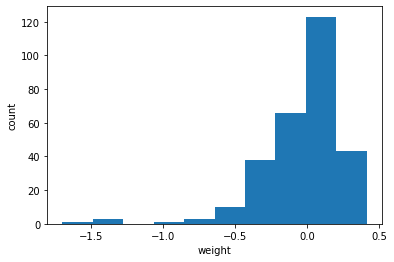

In [9]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

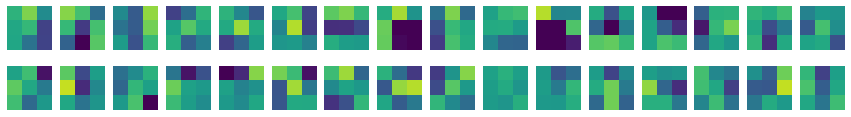

In [11]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2) : 
  for j in range(16):
    axs[i,j].imshow(conv_weights[:,:,0,i*16 +j], vmin=-0.5, vmax=0.5)
    axs[i,j].axis('off')
plt.show()

In [14]:
no_train_model = keras.Sequential()
no_train_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

In [15]:
no_train_conv = no_train_model.layers[0]
print(no_train_conv.weights[0].shape)

(3, 3, 1, 32)


In [16]:
no_train_weights = no_train_conv.weights[0].numpy()
print(no_train_weights.mean(), no_train_weights.std())

0.00226675 0.08271827


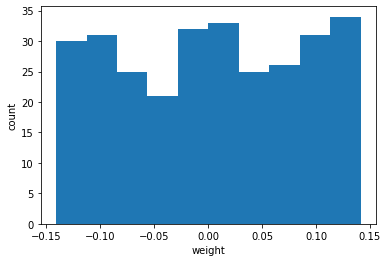

In [17]:
plt.hist(no_train_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

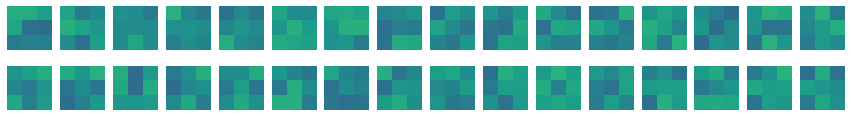

In [18]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2) : 
  for j in range(16):
    axs[i,j].imshow(no_train_weights[:,:,0,i*16 +j], vmin=-0.5, vmax=0.5)
    axs[i,j].axis('off')
plt.show()

4431872/4422102 [==============================] - 0s 0us/step


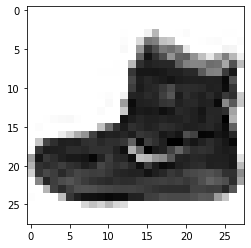

In [19]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [25]:
conv_acti = keras.Model(model.input, model.layers[0].output)

In [27]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(inputs)

In [28]:
print(feature_maps.shape)

(1, 28, 28, 32)


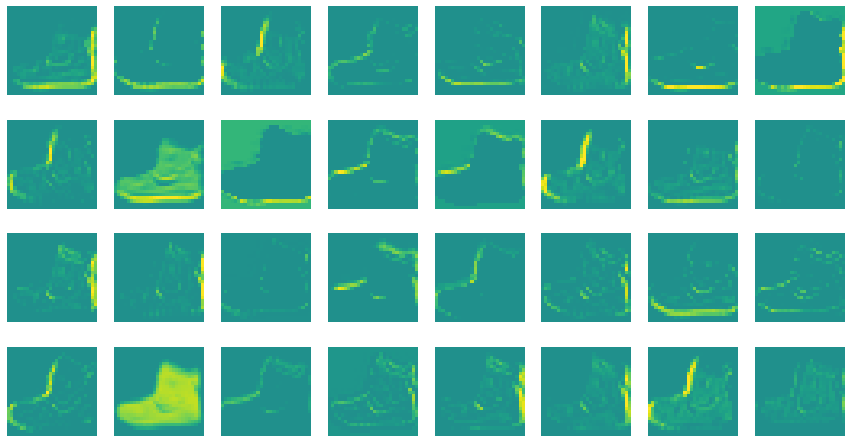

In [30]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))
for i in range(4) : 
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:,i*8 +j], vmin=-0.5, vmax=0.5)
    axs[i,j].axis('off')
plt.show()